In [1]:
from mmseg.apis import init_model, inference_model, show_result_pyplot

In [2]:
from mmengine import Config
import mmcv
import matplotlib.pyplot as plt
cfg = Config.fromfile('configs/maskformer/maskformer_r50-d32_8xb2-160k_ade20k-512x512.py')

In [3]:
check_path = "./work_dirs/maskformer_class_test1/iter_24000.pth"

In [4]:
model = init_model(cfg, check_path, 'cuda:0')

Loads checkpoint by local backend from path: ./work_dirs/maskformer_class_test1/iter_24000.pth


In [5]:
im_path = "data/f-35/images/val2017/11d28995-Screenshot328.png"
img = mmcv.imread(im_path)
# plt.figure(figsize=(8, 6))
# vis_result = show_result_pyplot(model, img, result)
# plt.imshow(mmcv.bgr2rgb(vis_result))

In [6]:
result = inference_model(model, img)

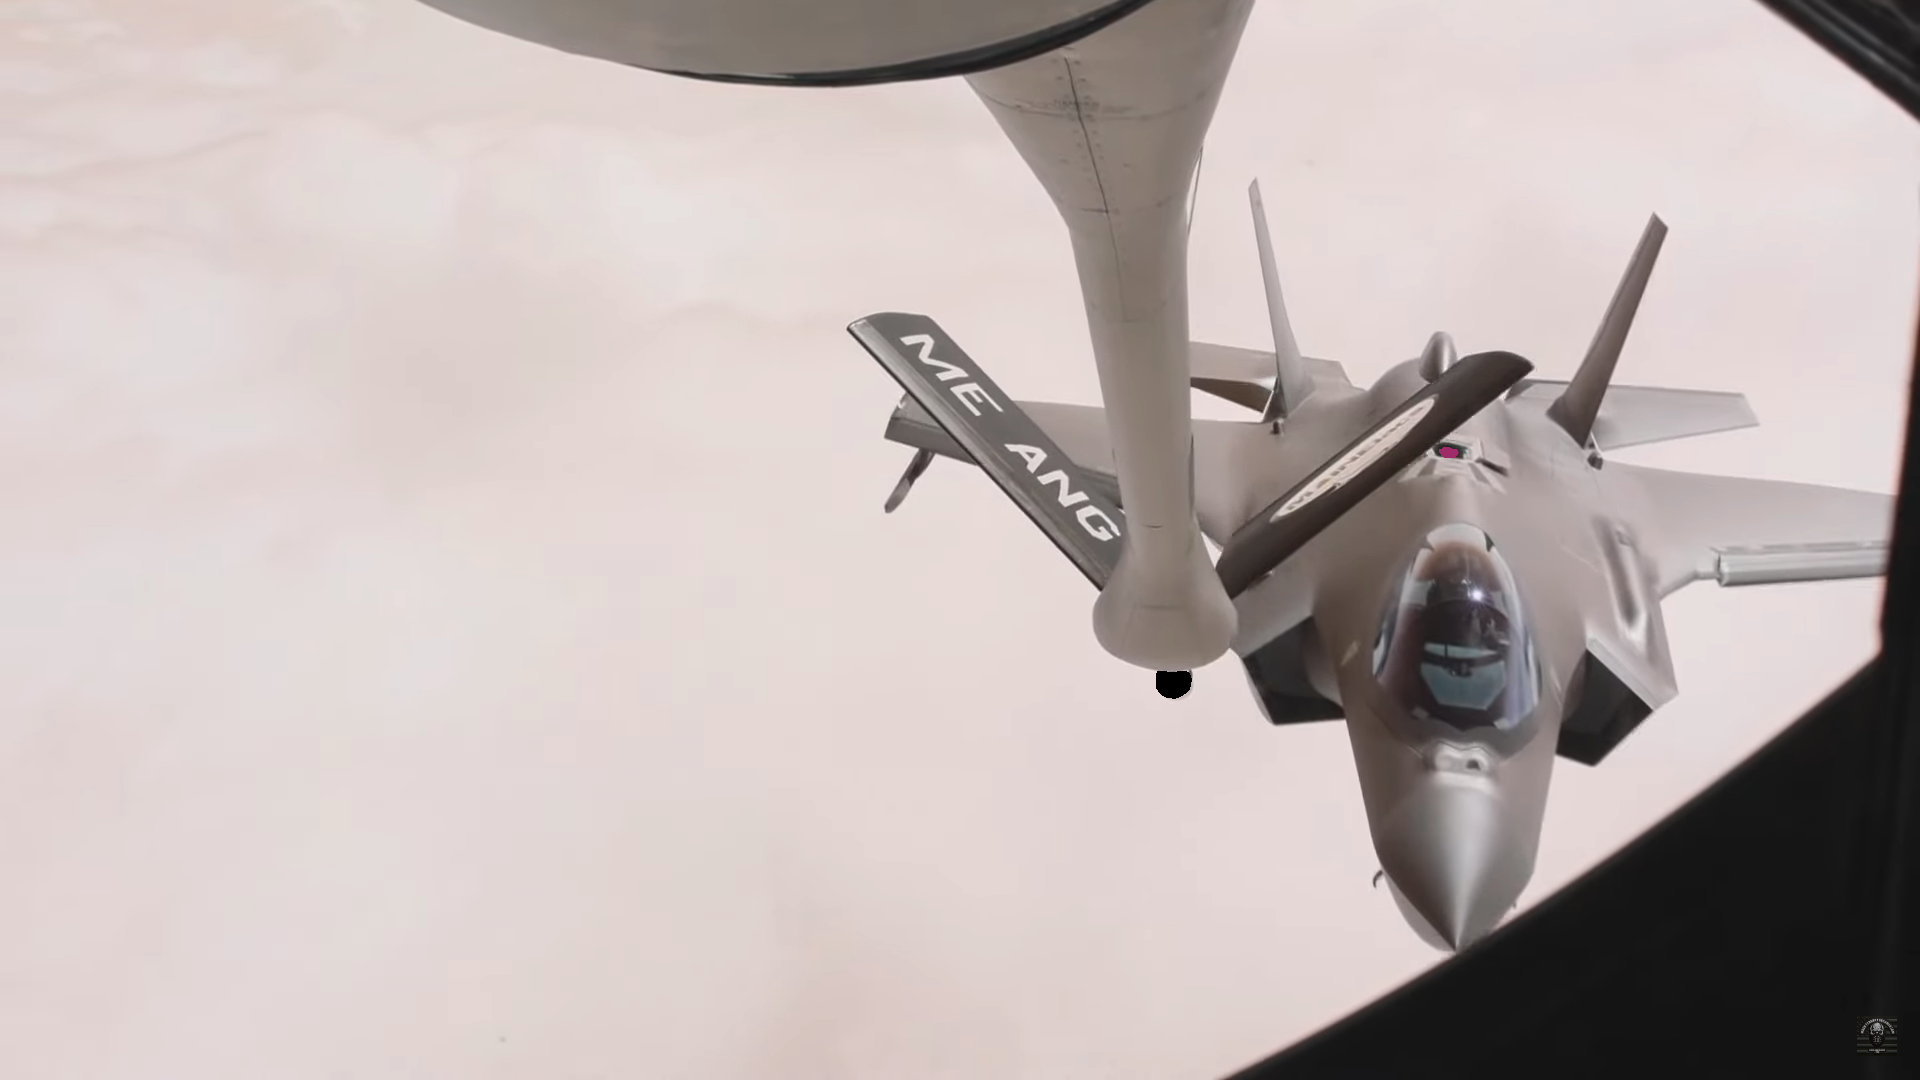

In [7]:
import cv2
seg = result.to_dict()["pred_sem_seg"]['data'].to('cpu').numpy()
logits = result.to_dict()['seg_logits']['data'].to('cpu').numpy()
im = cv2.imread(im_path)
im[seg[0] == 1] = [0,0,0]
im[seg[0] == 2] = [159, 43, 104]
from PIL import Image
Image.fromarray(im)

In [9]:
logits

array([[[9.99999166e-01, 9.99999166e-01, 9.99999166e-01, ...,
         9.99956548e-01, 9.99956548e-01, 9.99956548e-01],
        [9.99999166e-01, 9.99999166e-01, 9.99999166e-01, ...,
         9.99956548e-01, 9.99956548e-01, 9.99956548e-01],
        [9.99999166e-01, 9.99999166e-01, 9.99999166e-01, ...,
         9.99956548e-01, 9.99956548e-01, 9.99956548e-01],
        ...,
        [9.92313921e-01, 9.92313921e-01, 9.92313921e-01, ...,
         9.95638549e-01, 9.95638549e-01, 9.95638549e-01],
        [9.92313921e-01, 9.92313921e-01, 9.92313921e-01, ...,
         9.95638549e-01, 9.95638549e-01, 9.95638549e-01],
        [9.92313921e-01, 9.92313921e-01, 9.92313921e-01, ...,
         9.95638549e-01, 9.95638549e-01, 9.95638549e-01]],

       [[4.84940479e-08, 4.84940479e-08, 4.84940479e-08, ...,
         6.05844107e-05, 6.05844107e-05, 6.05844107e-05],
        [4.84940514e-08, 4.84940514e-08, 4.84940514e-08, ...,
         6.05844107e-05, 6.05844107e-05, 6.05844107e-05],
        [4.84940479e-08, 

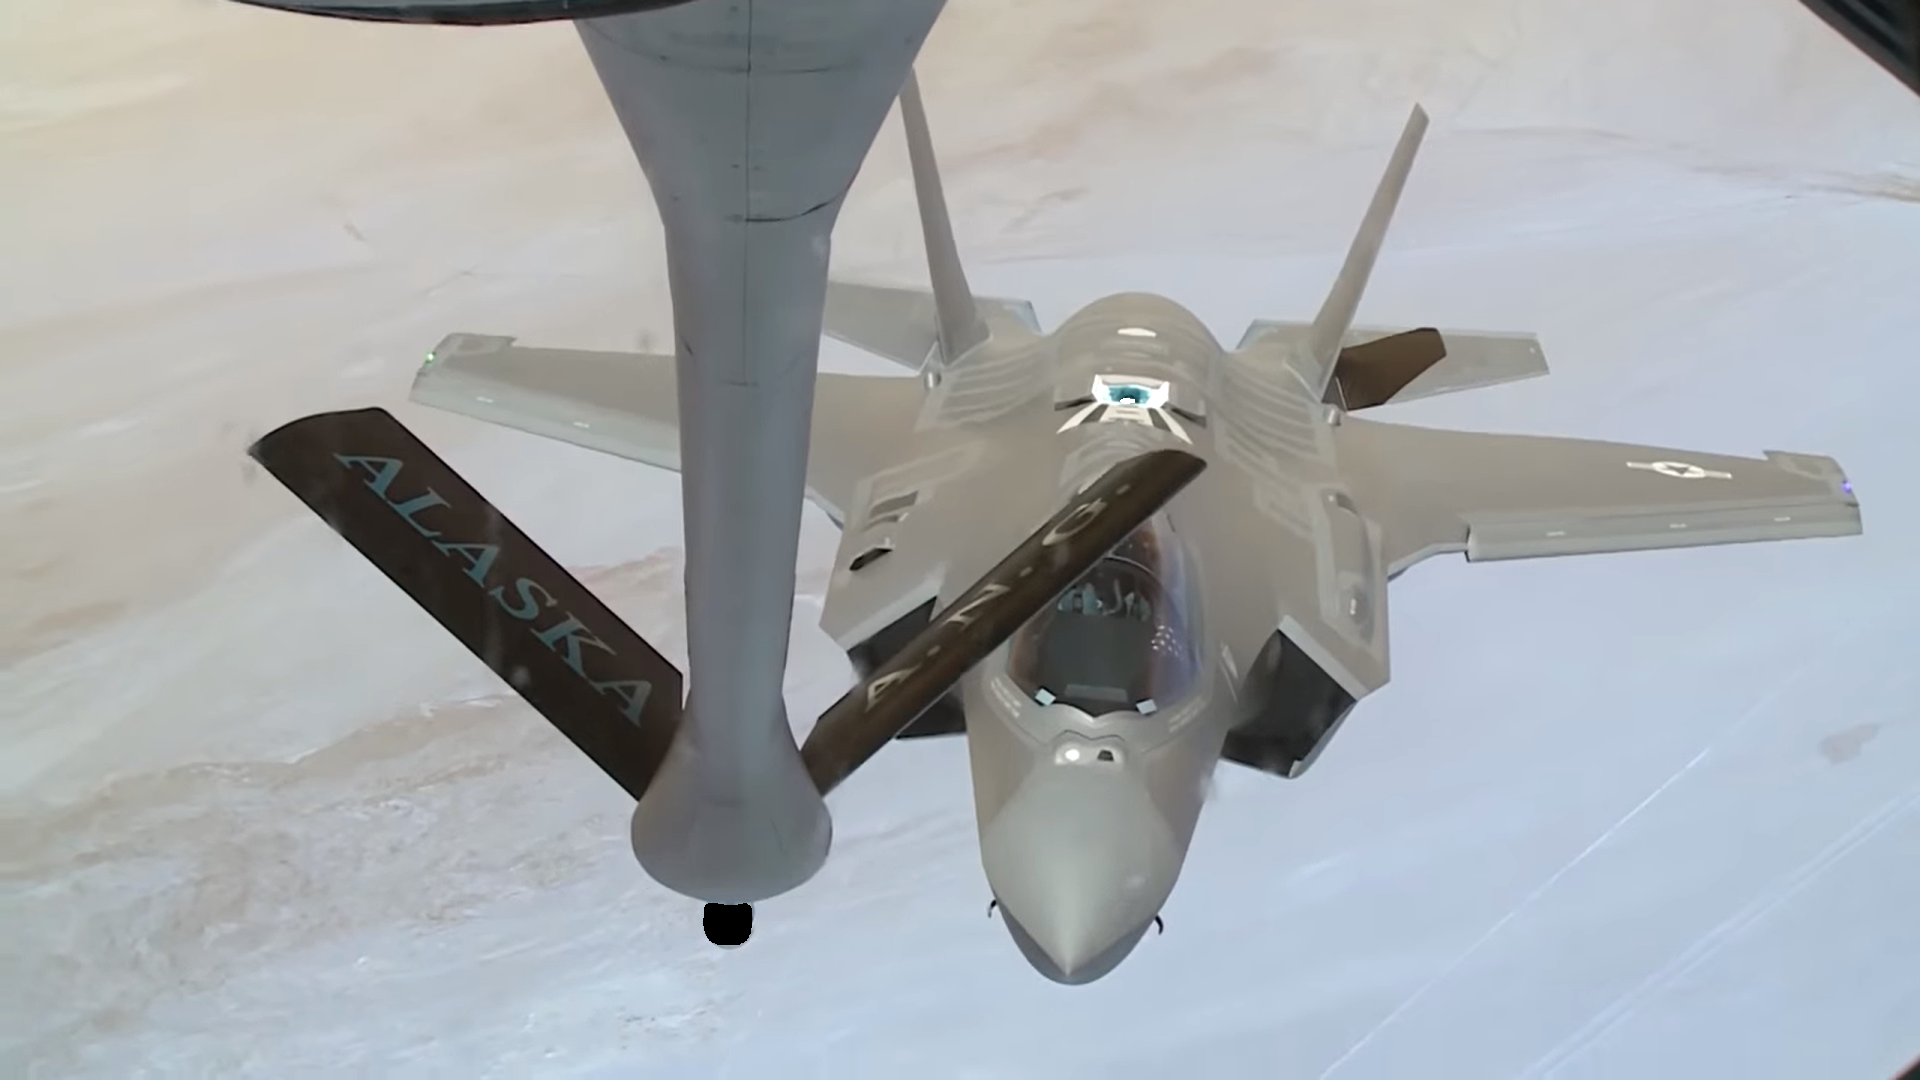

In [60]:
(seg[0] == 1).shape

(1080, 1920)

In [65]:
data = result.to_dict()['seg_logits']['data'].to('cpu').numpy()

In [71]:
data[1] >= 0.8

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [41]:
tmp = seg.to('cpu')

In [45]:
seg = tmp.numpy()

In [50]:
import numpy as np
seg.shape

(1, 1080, 1920)